In [6]:
from keras import optimizers
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils.layer_utils import print_summary
from keras.deeplearningmodels.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
from keras.deeplearningmodels.inception_resnet_v2 import InceptionResNetV2
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

from sklearn import cross_validation

import os, sys

import h5py

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


/home/deeplearningutp/anaconda3/envs/tensorflow-utp/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:

from keras.applications.xception import Xception

In [8]:

# Create the model
# base_model = InceptionResNetV2(include_top=False, weights=None)
# model_name = 'InceptionResNetV2'

#base_model = ResNet50(include_top=False, weights=None)
#model_name = 'ResNet50'

#base_model = resnet152_model()
#model_name = 'ResNet152'

base_model = Xception(include_top=False, weights=None)
model_name = 'Xception'

print_summary(base_model)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, None, None, 32 864         input_3[0][0]                    
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, None, None, 32 128         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, None, None, 32 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [4]:

# If directory exist
def check_dir(path):
    if os.path.exists(path):
        print("Dir already existing")
    
    elif sys.platform == 'win32':
        os.system('mkdir ' + path)
    
    else:
        os.system('mkdir -p ' + path)
        print('New Path created : ', path)
    return 
    

In [5]:
# Set root to dataset location
root = './dataset/Cropped_BM3D/Experiment_' + model_name
check_dir(root)
print('current root folder is : ', root)


New Path created :  ./dataset/Cropped_BM3D/Experiment_InceptionResNetV2
current root folder is :  ./dataset/Cropped_BM3D/Experiment_InceptionResNetV2


In [8]:

# Define the routine the add a new last layer
def add_new_last_layer(base_model, nb_classes):
 
    print('Add last layer to the convnet..')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(nb_classes, activation='relu')(x)  # new FC layer, random init
    predictions = Dense(nb_classes, activation='softmax')(x)  # new softmax layer
    model = Model(inputs=base_model.input, outputs=predictions)  # Combine the network
    
    """
    from keras.models import Model
    >> The `Model` class adds training & evaluation routines to a `Container`.
    """
    return model


In [9]:


# Add the new last layer to the model 
nb_classes = 2
model = add_new_last_layer(base_model, nb_classes)

learning_rate = 0.0001
decay_rate = learning_rate / 100
momentum = 0.8
# SGD = optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
SGD = optimizers.SGD(lr=learning_rate)

model.compile(optimizer=RMSprop(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print_summary(model)

Add last layer to the convnet..


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, None, None, 32 864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, None, None, 32 96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, None, None, 32 0           batch_normalization_1[0][0]      
___________________________________________________________________________________________


conv2d_95 (Conv2D)               (None, None, None, 16 143360      activation_94[0][0]              
____________________________________________________________________________________________________
batch_normalization_95 (BatchNor (None, None, None, 16 480         conv2d_95[0][0]                  
____________________________________________________________________________________________________
activation_95 (Activation)       (None, None, None, 16 0           batch_normalization_95[0][0]     
____________________________________________________________________________________________________
conv2d_93 (Conv2D)               (None, None, None, 19 208896      block17_4_ac[0][0]               
____________________________________________________________________________________________________
conv2d_96 (Conv2D)               (None, None, None, 19 215040      activation_95[0][0]              
__________________________________________________________________________________________

In [11]:
# Save the random weight
# model1.load_weights(path) #If you have pretrained weights
path = root + '/weight/'
# path = '/home/deeplearningutp/PycharmProjects/OCT_Project/dataset/Cropped_BM3D/tmp/weight/InceptionResNetV2_rndm_weight .h5'
print('root: ', root)
print('model name: ', model_name)

check_dir(path)

path = path + model_name + '_rndm_weight.h5'
print('path: ', path)
model.save_weights(path)  # If you want to save random weights


root:  ./dataset/Cropped_BM3D/ExperimentResNet50
model name:  ResNet50
Dir already existing
path:  ./dataset/Cropped_BM3D/ExperimentResNet50/weight/ResNet50_rndm_weight.h5


In [12]:
# Load the data
hdf5_path = './dataset/Cropped_BM3D/hdf5_file/Cropped_BM3D_4.hdf5'

h5f = h5py.File(hdf5_path, 'r')

input_img = h5f['img'][:]
input_labels = h5f['labels_OHE'][:]

h5f.close()

In [13]:
# Set Parameters of OCT-NET
batch_size = int(16)
nb_epochs = int(1)


Dir already existing
Training and Testing on the OCT Volume no:  1
(3968, 224, 224, 3) (128, 224, 224, 3) (3968, 2) (128, 2)


Dir already existing
Dir already existing
Dir already existing
Train on 3968 samples, validate on 128 samples


/home/deeplearningutp/anaconda3/envs/tensorflow-utp/lib/python3.5/site-packages/ipykernel_launcher.py:87: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1


  16/3968 [..............................] - ETA: 53s - loss: 1.8996 - acc: 0.4375

  32/3968 [..............................] - ETA: 52s - loss: 1.4945 - acc: 0.5938

  48/3968 [..............................] - ETA: 51s - loss: 1.1378 - acc: 0.7083

  64/3968 [..............................] - ETA: 50s - loss: 0.9732 - acc: 0.7500

  80/3968 [..............................] - ETA: 50s - loss: 0.8613 - acc: 0.7500

  96/3968 [..............................] - ETA: 50s - loss: 0.7628 - acc: 0.7917

 112/3968 [..............................] - ETA: 49s - loss: 0.7091 - acc: 0.8036

 128/3968 [..............................]

 - ETA: 49s - loss: 0.6738 - acc: 0.8203

 144/3968 [>.............................] - ETA: 48s - loss: 0.6578 - acc: 0.8264

 160/3968 [>.............................] - ETA: 48s - loss: 0.6376 - acc: 0.8125

 176/3968 [>.............................] - ETA: 48s - loss: 0.6168 - acc: 0.8125

 192/3968 [>.............................] - ETA: 48s - loss: 0.6230 - acc: 0.8021

 208/3968 [>.............................] - ETA: 47s - loss: 0.6129 - acc: 0.8029

 224/3968 [>.............................] - ETA: 47s - loss: 0.6066 - acc: 0.7991

 240/3968 [>.............................] - ETA: 47s - loss: 0.6042 - acc: 0.8000

 256/3968 [>.............................] - ETA: 47s - loss: 0.6076 - acc: 0.7930

 272/3968 [=>............................] - ETA: 46s - loss: 0.5974 - acc: 0.7941

 288/3968 [=>............................] - ETA: 46s - loss: 0.6384 - acc: 0.7847

 304/3968 [=>............................] - ETA: 46s - loss: 0.6421 - acc: 0.7697

 320/3968 [=>............................] - ETA: 46s - loss: 0.6499 - acc: 0.7406

 336/3968 [=>............................] - ETA: 46s - loss: 0.6479 - acc: 0.7381

 352/3968 [=>............................] - ETA: 45s - loss: 0.6409 - acc: 0.7358



 368/3968 [=>............................] - ETA: 45s - loss: 0.6335 - acc: 0.7446

 384/3968 [=>............................] - ETA: 45s - loss: 0.6245 - acc: 0.7422

 400/3968 [==>...........................] - ETA: 45s - loss: 0.6224 - acc: 0.7475

 416/3968 [==>...........................] - ETA: 44s - loss: 0.6176 - acc: 0.7500

 432/3968 [==>...........................] - ETA: 44s - loss: 0.6166 - acc: 0.7523

 448/3968 [==>...........................] - ETA: 44s - loss: 0.6129 - acc: 0.7500

 464/3968 [==>...........................] - ETA: 44s - loss: 0.6222 - acc: 0.7522

 480/3968 [==>...........................] - ETA: 44s - loss: 0.6237 - acc: 0.7479

 496/3968 [==>...........................] - ETA: 43s - loss: 0.6236 - acc: 0.7460

 512/3968 [==>...........................] - ETA: 43s - loss: 0.6222 - acc: 0.7422

 528/3968 [==>...........................] - ETA: 43s - loss: 0.6224 - acc: 0.7424

 544/3968 [===>..........................] - ETA: 43s - loss: 0.6191 - acc: 0.7445

 560/3968 [===>..........................] - ETA: 43s - loss: 0.6162 - acc: 0.7464

 576/3968 [===>..........................] - ETA: 42s - loss: 0.6136 - acc: 0.7500

 592/3968 [===>..........................] - ETA: 42s - loss: 0.6075 - acc: 0.7534

 608/3968 [===>..........................] - ETA: 42s - loss: 0.6055 - acc: 0.7516

 624/3968 [===>..........................] - ETA: 42s - loss: 0.6007 - acc: 0.7516

 640/3968 [===>..........................] - ETA: 42s - loss: 0.5989 - acc: 0.7516

 656/3968 [===>..........................] - ETA: 41s - loss: 0.6034 - acc: 0.7530

 672/3968 [====>.........................] - ETA: 41s - loss: 0.6018 - acc: 0.7530

 688/3968 [====>.........................] - ETA: 41s - loss: 0.6007 - acc: 0.7529

 704/3968 [====>.........................] - ETA: 41s - loss: 0.5963 - acc: 0.7557

 720/3968 [====>.........................] - ETA: 41s - loss: 0.5927 - acc: 0.7569

 736/3968 [====>.........................]

 - ETA: 40s - loss: 0.5876 - acc: 0.7595

 752/3968 [====>.........................] - ETA: 40s - loss: 0.5838 - acc: 0.7606

 768/3968 [====>.........................] - ETA: 40s - loss: 0.5955 - acc: 0.7591

 784/3968 [====>.........................] - ETA: 40s - loss: 0.5951 - acc: 0.7615

 800/3968 [=====>........................] - ETA: 40s - loss: 0.5914 - acc: 0.7662

 816/3968 [=====>........................] - ETA: 39s - loss: 0.5881 - acc: 0.7708

 832/3968 [=====>........................] - ETA: 39s - loss: 0.5901 - acc: 0.7728

 848/3968 [=====>........................] - ETA: 39s - loss: 0.5894 - acc: 0.7724

 864/3968 [=====>........................] - ETA: 39s - loss: 0.5889 - acc: 0.7720

 880/3968 [=====>........................] - ETA: 39s - loss: 0.5864 - acc: 0.7750

 896/3968 [=====>........................] - ETA: 38s - loss: 0.5892 - acc: 0.7712

 912/3968 [=====>........................] - ETA: 38s - loss: 0.5887 - acc: 0.7708

 928/3968 [======>.......................] - ETA: 38s - loss: 0.5875 - acc: 0.7748

 944/3968 [======>.......................] - ETA: 38s - loss: 0.5858 - acc: 0.7765

 960/3968 [======>.......................] - ETA: 38s - loss: 0.5837 - acc: 0.7771



 976/3968 [======>.......................] - ETA: 37s - loss: 0.5834 - acc: 0.7766

 992/3968 [======>.......................] - ETA: 37s - loss: 0.5814 - acc: 0.7782

1008/3968 [======>.......................] - ETA: 37s - loss: 0.5791 - acc: 0.7808

1024/3968 [======>.......................] - ETA: 37s - loss: 0.5834 - acc: 0.7803

1040/3968 [======>.......................] - ETA: 37s - loss: 0.5814 - acc: 0.7817

1056/3968 [======>.......................] - ETA: 36s - loss: 0.5793 - acc: 0.7850

1072/3968 [=======>......................] - ETA: 36s - loss: 0.5767 - acc: 0.7864

1088/3968 [=======>......................] - ETA: 36s - loss: 0.5775 - acc: 0.7886

1104/3968 [=======>......................] - ETA: 36s - loss: 0.5757 - acc: 0.7908



1120/3968 [=======>......................] - ETA: 36s - loss: 0.5749 - acc: 0.7911

1136/3968 [=======>......................] - ETA: 35s - loss: 0.5724 - acc: 0.7923

1152/3968 [=======>......................] - ETA: 35s - loss: 0.5705 - acc: 0.7943

1168/3968 [=======>......................] - ETA: 35s - loss: 0.5701 - acc: 0.7954

1184/3968 [=======>......................] - ETA: 35s - loss: 0.5692 - acc: 0.7965

1200/3968 [========>.....................] - ETA: 35s - loss: 0.5679 - acc: 0.7975

1216/3968 [========>.....................] - ETA: 34s - loss: 0.5651 - acc: 0.7985

1232/3968 [========>.....................] - ETA: 34s - loss: 0.5629 - acc: 0.8011

1248/3968 [========>.....................] - ETA: 34s - loss: 0.5613 - acc: 0.8021

1264/3968 [========>.....................] - ETA: 34s - loss: 0.5580 - acc: 0.8038

1280/3968 [========>.....................] - ETA: 34s - loss: 0.5571 - acc: 0.8055

1296/3968 [========>.....................] - ETA: 33s - loss: 0.5570 - acc: 0.8032

1312/3968 [========>.....................] - ETA: 33s - loss: 0.5560 - acc: 0.8049

1328/3968 [=========>....................] - ETA: 33s - loss: 0.5603 - acc: 0.8050

1344/3968 [=========>....................] - ETA: 33s - loss: 0.5615 - acc: 0.7984

1360/3968 [=========>....................] - ETA: 33s - loss: 0.5618 - acc: 0.7985

1376/3968 [=========>....................] - ETA: 32s - loss: 0.5613 - acc: 0.7987

1392/3968 [=========>....................] - ETA: 32s - loss: 0.5616 - acc: 0.8003

1408/3968 [=========>....................] - ETA: 32s - loss: 0.5619 - acc: 0.8004

1424/3968 [=========>....................] - ETA: 32s - loss: 0.5649 - acc: 0.7992

1440/3968 [=========>....................] - ETA: 31s - loss: 0.5643 - acc: 0.7993

1456/3968 [==========>...................] - ETA: 31s - loss: 0.5635 - acc: 0.8001

1472/3968 [==========>...................] - ETA: 31s - loss: 0.5641 - acc: 0.8003

1488/3968 [==========>...................] - ETA: 31s - loss: 0.5626 - acc: 0.8011

1504/3968 [==========>...................] - ETA: 31s - loss: 0.5617 - acc: 0.8032

1520/3968 [==========>...................] - ETA: 30s - loss: 0.5608 - acc: 0.8053

1536/3968 [==========>...................] - ETA: 30s - loss: 0.5625 - acc: 0.8060

1552/3968 [==========>...................] - ETA: 30s - loss: 0.5622 - acc: 0.8054

1568/3968 [==========>...................] - ETA: 30s - loss: 0.5604 - acc: 0.8068

1584/3968 [==========>...................] - ETA: 30s - loss: 0.5619 - acc: 0.8056

1600/3968 [===========>..................] - ETA: 29s - loss: 0.5615 - acc: 0.8063

1616/3968 [===========>..................] - ETA: 29s - loss: 0.5600 - acc: 0.8075

1632/3968 [===========>..................] - ETA: 29s - loss: 0.5586 - acc: 0.8082

1648/3968 [===========>..................] - ETA: 29s - loss: 0.5606 - acc: 0.8076

1664/3968 [===========>..................] - ETA: 29s - loss: 0.5615 - acc: 0.8065

1680/3968 [===========>..................] - ETA: 28s - loss: 0.5605 - acc: 0.8065

1696/3968 [===========>..................] - ETA: 28s - loss: 0.5602 - acc: 0.8066

1712/3968 [===========>..................] - ETA: 28s - loss: 0.5592 - acc: 0.8078

1728/3968 [============>.................] - ETA: 28s - loss: 0.5580 - acc: 0.8090

1744/3968 [============>.................] - ETA: 28s - loss: 0.5577 - acc: 0.8096

1760/3968 [============>.................] - ETA: 27s - loss: 0.5567 - acc: 0.8102

1776/3968 [============>.................] - ETA: 27s - loss: 0.5545 - acc: 0.8114

1792/3968 [============>.................] - ETA: 27s - loss: 0.5533 - acc: 0.8131

1808/3968 [============>.................] - ETA: 27s - loss: 0.5526 - acc: 0.8114

1824/3968 [============>.................] - ETA: 27s - loss: 0.5555 - acc: 0.8114

1840/3968 [============>.................] - ETA: 26s - loss: 0.5550 - acc: 0.8114

1856/3968 [=============>................] - ETA: 26s - loss: 0.5540 - acc: 0.8125

1872/3968 [=============>................] - ETA: 26s - loss: 0.5534 - acc: 0.8120

1888/3968 [=============>................] - ETA: 26s - loss: 0.5524 - acc: 0.8130

1904/3968 [=============>................] - ETA: 26s - loss: 0.5505 - acc: 0.8141

1920/3968 [=============>................] - ETA: 25s - loss: 0.5503 - acc: 0.8151

1936/3968 [=============>................] - ETA: 25s - loss: 0.5497 - acc: 0.8151

1952/3968 [=============>................] - ETA: 25s - loss: 0.5488 - acc: 0.8145

1968/3968 [=============>................] - ETA: 25s - loss: 0.5472 - acc: 0.8155

1984/3968 [==============>...............] - ETA: 25s - loss: 0.5472 - acc: 0.8150

2000/3968 [==============>...............] - ETA: 24s - loss: 0.5461 - acc: 0.8165

2016/3968 [==============>...............] - ETA: 24s - loss: 0.5446 - acc: 0.8160

2032/3968 [==============>...............] - ETA: 24s - loss: 0.5434 - acc: 0.8155

2048/3968 [==============>...............] - ETA: 24s - loss: 0.5434 - acc: 0.8164

2064/3968 [==============>...............] - ETA: 24s - loss: 0.5427 - acc: 0.8169

2080/3968 [==============>...............] - ETA: 23s - loss: 0.5416 - acc: 0.8168

2096/3968 [==============>...............] - ETA: 23s - loss: 0.5412 - acc: 0.8177

2112/3968 [==============>...............] - ETA: 23s - loss: 0.5401 - acc: 0.8168

2128/3968 [===============>..............] - ETA: 23s - loss: 0.5431 - acc: 0.8172

2144/3968 [===============>..............] - ETA: 23s - loss: 0.5440 - acc: 0.8162

2160/3968 [===============>..............] - ETA: 22s - loss: 0.5437 - acc: 0.8162

2176/3968 [===============>..............] - ETA: 22s - loss: 0.5438 - acc: 0.8166

2192/3968 [===============>..............] - ETA: 22s - loss: 0.5441 - acc: 0.8166

2208/3968 [===============>..............] - ETA: 22s - loss: 0.5439 - acc: 0.8166

2224/3968 [===============>..............] - ETA: 22s - loss: 0.5435 - acc: 0.8161

2240/3968 [===============>..............] - ETA: 21s - loss: 0.5434 - acc: 0.8152

2256/3968 [================>.............] - ETA: 21s - loss: 0.5427 - acc: 0.8156

2272/3968 [================>.............] - ETA: 21s - loss: 0.5416 - acc: 0.8160

2288/3968 [================>.............] - ETA: 21s - loss: 0.5401 - acc: 0.8173

2304/3968 [================>.............] - ETA: 21s - loss: 0.5409 - acc: 0.8181

2320/3968 [================>.............] - ETA: 20s - loss: 0.5421 - acc: 0.8181

2336/3968 [================>.............] - ETA: 20s - loss: 0.5414 - acc: 0.8176

2352/3968 [================>.............] - ETA: 20s - loss: 0.5402 - acc: 0.8176

2368/3968 [================>.............] - ETA: 20s - loss: 0.5394 - acc: 0.8180

2384/3968 [=================>............] - ETA: 20s - loss: 0.5391 - acc: 0.8180

2400/3968 [=================>............] - ETA: 19s - loss: 0.5379 - acc: 0.8187

2416/3968 [=================>............] - ETA: 19s - loss: 0.5368 - acc: 0.8195

2432/3968 [=================>............] - ETA: 19s - loss: 0.5355 - acc: 0.8195

2448/3968 [=================>............] - ETA: 19s - loss: 0.5340 - acc: 0.8207

2464/3968 [=================>............] - ETA: 19s - loss: 0.5334 - acc: 0.8214

2480/3968 [=================>............] - ETA: 18s - loss: 0.5385 - acc: 0.8210

2496/3968 [=================>............] - ETA: 18s - loss: 0.5379 - acc: 0.8217

2512/3968 [=================>............] - ETA: 18s - loss: 0.5385 - acc: 0.8225

2528/3968 [==================>...........] - ETA: 18s - loss: 0.5380 - acc: 0.8228

2544/3968 [==================>...........] - ETA: 18s - loss: 0.5384 - acc: 0.8231

2560/3968 [==================>...........] - ETA: 17s - loss: 0.5376 - acc: 0.8230

2576/3968 [==================>...........] - ETA: 17s - loss: 0.5368 - acc: 0.8234

2592/3968 [==================>...........] - ETA: 17s - loss: 0.5359 - acc: 0.8241

2608/3968 [==================>...........] - ETA: 17s - loss: 0.5346 - acc: 0.8252

2624/3968 [==================>...........] - ETA: 17s - loss: 0.5339 - acc: 0.8258

2640/3968 [==================>...........] - ETA: 16s - loss: 0.5335 - acc: 0.8261

2656/3968 [===================>..........] - ETA: 16s - loss: 0.5332 - acc: 0.8268

2672/3968 [===================>..........] - ETA: 16s - loss: 0.5324 - acc: 0.8275

2688/3968 [===================>..........] - ETA: 16s - loss: 0.5312 - acc: 0.8281

2704/3968 [===================>..........] - ETA: 15s - loss: 0.5306 - acc: 0.8277

2720/3968 [===================>..........] - ETA: 15s - loss: 0.5317 - acc: 0.8272

2736/3968 [===================>..........] - ETA: 15s - loss: 0.5314 - acc: 0.8271

2752/3968 [===================>..........] - ETA: 15s - loss: 0.5312 - acc: 0.8270

2768/3968 [===================>..........] - ETA: 15s - loss: 0.5306 - acc: 0.8273

2784/3968 [====================>.........] - ETA: 14s - loss: 0.5315 - acc: 0.8272

2800/3968 [====================>.........] - ETA: 14s - loss: 0.5306 - acc: 0.8271

2816/3968 [====================>.........] - ETA: 14s - loss: 0.5342 - acc: 0.8267

2832/3968 [====================>.........] - ETA: 14s - loss: 0.5337 - acc: 0.8266

2848/3968 [====================>.........] - ETA: 14s - loss: 0.5341 - acc: 0.8265

2864/3968 [====================>.........] - ETA: 13s - loss: 0.5341 - acc: 0.8265

2880/3968 [====================>.........] - ETA: 13s - loss: 0.5337 - acc: 0.8267

2896/3968 [====================>.........] - ETA: 13s - loss: 0.5329 - acc: 0.8267

2912/3968 [=====================>........] - ETA: 13s - loss: 0.5322 - acc: 0.8269

2928/3968 [=====================>........] - ETA: 13s - loss: 0.5313 - acc: 0.8275

2944/3968 [=====================>........] - ETA: 12s - loss: 0.5303 - acc: 0.8281

2960/3968 [=====================>........] - ETA: 12s - loss: 0.5304 - acc: 0.8284

2976/3968 [=====================>........] - ETA: 12s - loss: 0.5296 - acc: 0.8293

2992/3968 [=====================>........] - ETA: 12s - loss: 0.5293 - acc: 0.8295

3008/3968 [=====================>........] - ETA: 12s - loss: 0.5284 - acc: 0.8295

3024/3968 [=====================>........] - ETA: 11s - loss: 0.5275 - acc: 0.8297

3040/3968 [=====================>........] - ETA: 11s - loss: 0.5278 - acc: 0.8293

3056/3968 [======================>.......] - ETA: 11s - loss: 0.5275 - acc: 0.8295

3072/3968 [======================>.......] - ETA: 11s - loss: 0.5265 - acc: 0.8301

3088/3968 [======================>.......] - ETA: 11s - loss: 0.5289 - acc: 0.8293

3104/3968 [======================>.......] - ETA: 10s - loss: 0.5287 - acc: 0.8296

3120/3968 [======================>.......] - ETA: 10s - loss: 0.5285 - acc: 0.8292

3136/3968 [======================>.......] - ETA: 10s - loss: 0.5274 - acc: 0.8291

3152/3968 [======================>.......] - ETA: 10s - loss: 0.5267 - acc: 0.8299

3168/3968 [======================>.......] - ETA: 10s - loss: 0.5260 - acc: 0.8308

3184/3968 [=======================>......] - ETA: 9s - loss: 0.5252 - acc: 0.8310 

3200/3968 [=======================>......] - ETA: 9s - loss: 0.5251 - acc: 0.8316

3216/3968 [=======================>......] - ETA: 9s - loss: 0.5243 - acc: 0.8321

3232/3968 [=======================>......] - ETA: 9s - loss: 0.5263 - acc: 0.8326

3248/3968 [=======================>......] - ETA: 9s - loss: 0.5259 - acc: 0.8325

3264/3968 [=======================>......] - ETA: 8s - loss: 0.5252 - acc: 0.8330



3280/3968 [=======================>......] - ETA: 8s - loss: 0.5244 - acc: 0.8338

3296/3968 [=======================>......] - ETA: 8s - loss: 0.5256 - acc: 0.8337

3312/3968 [========================>.....] - ETA: 8s - loss: 0.5249 - acc: 0.8342

3328/3968 [========================>.....] - ETA: 8s - loss: 0.5258 - acc: 0.8338

3344/3968 [========================>.....] - ETA: 7s - loss: 0.5258 - acc: 0.8340

3360/3968 [========================>.....] - ETA: 7s - loss: 0.5256 - acc: 0.8345

3376/3968 [========================>.....] - ETA: 7s - loss: 0.5252 - acc: 0.8350

3392/3968 [========================>.....] - ETA: 7s - loss: 0.5249 - acc: 0.8355

3408/3968 [========================>.....] - ETA: 7s - loss: 0.5244 - acc: 0.8357

3424/3968 [========================>.....] - ETA: 6s - loss: 0.5238 - acc: 0.8362

3440/3968 [=========================>....] - ETA: 6s - loss: 0.5242 - acc: 0.8366

3456/3968 [=========================>....] - ETA: 6s - loss: 0.5244 - acc: 0.8368

3472/3968 [=========================>....] - ETA: 6s - loss: 0.5242 - acc: 0.8361

3488/3968 [=========================>....] - ETA: 6s - loss: 0.5235 - acc: 0.8363

3504/3968 [=========================>....] - ETA: 5s - loss: 0.5228 - acc: 0.8370

3520/3968 [=========================>....] - ETA: 5s - loss: 0.5225 - acc: 0.8375

3536/3968 [=========================>....] - ETA: 5s - loss: 0.5226 - acc: 0.8377

3552/3968 [=========================>....] - ETA: 5s - loss: 0.5223 - acc: 0.8376

3568/3968 [=========================>....] - ETA: 5s - loss: 0.5215 - acc: 0.8380

3584/3968 [==========================>...] - ETA: 4s - loss: 0.5211 - acc: 0.8387

3600/3968 [==========================>...] - ETA: 4s - loss: 0.5206 - acc: 0.8392

3616/3968 [==========================>...] - ETA: 4s - loss: 0.5202 - acc: 0.8396

3632/3968 [==========================>...] - ETA: 4s - loss: 0.5196 - acc: 0.8400

3648/3968 [==========================>...] - ETA: 4s - loss: 0.5202 - acc: 0.8405

3664/3968 [==========================>...] - ETA: 3s - loss: 0.5197 - acc: 0.8406

3680/3968 [==========================>...] - ETA: 3s - loss: 0.5187 - acc: 0.8413

3696/3968 [==========================>...] - ETA: 3s - loss: 0.5199 - acc: 0.8415

3712/3968 [===========================>..] - ETA: 3s - loss: 0.5195 - acc: 0.8421

3728/3968 [===========================>..] - ETA: 3s - loss: 0.5191 - acc: 0.8420

3744/3968 [===========================>..] - ETA: 2s - loss: 0.5184 - acc: 0.8421

3760/3968 [===========================>..] - ETA: 2s - loss: 0.5186 - acc: 0.8426

3776/3968 [===========================>..] - ETA: 2s - loss: 0.5180 - acc: 0.8432

3792/3968 [===========================>..] - ETA: 2s - loss: 0.5176 - acc: 0.8436

3808/3968 [===========================>..] - ETA: 2s - loss: 0.5170 - acc: 0.8440

3824/3968 [===========================>..] - ETA: 1s - loss: 0.5165 - acc: 0.8444

3840/3968 [============================>.] - ETA: 1s - loss: 0.5163 - acc: 0.8451

3856/3968 [============================>.] - ETA: 1s - loss: 0.5159 - acc: 0.8454



3872/3968 [============================>.] - ETA: 1s - loss: 0.5151 - acc: 0.8456



3888/3968 [============================>.] - ETA: 1s - loss: 0.5155 - acc: 0.8457

3904/3968 [============================>.] - ETA: 0s - loss: 0.5152 - acc: 0.8455

3920/3968 [============================>.] - ETA: 0s - loss: 0.5150 - acc: 0.8459

3936/3968 [============================>.] - ETA: 0s - loss: 0.5145 - acc: 0.8460

3952/3968 [============================>.] - ETA: 0s - loss: 0.5138 - acc: 0.8464

Epoch 00000: val_acc improved from -inf to 0.00000, saving model to ./dataset/Cropped_BM3D/ExperimentResNet50/checkpoint/ResNet50_vol_1.hdf5


3968/3968 [==============================] - 51s - loss: 0.5133 - acc: 0.8470 - val_loss: 16.1181 - val_acc: 0.0000e+00

 32/128 [======>.......................] - ETA: 0s

 64/128 [==============>...............] - ETA: 0s

 96/128 [=====================>........] - ETA: 0s

128/128 [==============================] - 0s     


Test score: 16.1180953979
Test accuracy: 0.0
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


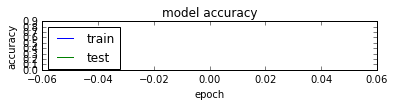

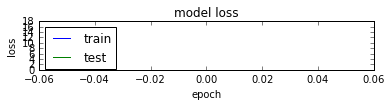

acc: 0.00%
Training and Testing on the OCT Volume no:  2
(3968, 224, 224, 3) (128, 224, 224, 3) (3968, 2) (128, 2)


Dir already existing
Dir already existing
Dir already existing
Train on 3968 samples, validate on 128 samples


Epoch 1/1


  16/3968 [..............................] - ETA: 53s - loss: 1.7608 - acc: 0.4375

  32/3968 [..............................] - ETA: 52s - loss: 1.3540 - acc: 0.5625

  48/3968 [..............................] - ETA: 50s - loss: 1.1686 - acc: 0.6250

  64/3968 [..............................] - ETA: 50s - loss: 1.0915 - acc: 0.5625

  80/3968 [..............................] - ETA: 50s - loss: 0.9565 - acc: 0.6125

  96/3968 [..............................] - ETA: 49s - loss: 0.8575 - acc: 0.6771

 112/3968 [..............................] - ETA: 49s - loss: 0.8270 - acc: 0.7143

 128/3968 [..............................] - ETA: 49s - loss: 0.7739 - acc: 0.7344

 144/3968 [>.............................] - ETA: 48s - loss: 0.7463 - acc: 0.7292

 160/3968 [>.............................] - ETA: 48s - loss: 0.7162 - acc: 0.7438

 176/3968 [>.............................] - ETA: 48s - loss: 0.6964 - acc: 0.7500

 192/3968 [>.............................] - ETA: 48s - loss: 0.6800 - acc: 0.7552

 208/3968 [>.............................] - ETA: 47s - loss: 0.6717 - acc: 0.7596

 224/3968 [>.............................] - ETA: 47s - loss: 0.6585 - acc: 0.7589



 240/3968 [>.............................] - ETA: 47s - loss: 0.6482 - acc: 0.7667

 256/3968 [>.............................] - ETA: 47s - loss: 0.6340 - acc: 0.7734

 272/3968 [=>............................] - ETA: 46s - loss: 0.6208 - acc: 0.7794

 288/3968 [=>............................] - ETA: 46s - loss: 0.6119 - acc: 0.7743

 304/3968 [=>............................] - ETA: 46s - loss: 0.6059 - acc: 0.7829

 320/3968 [=>............................] - ETA: 46s - loss: 0.6231 - acc: 0.7688

 336/3968 [=>............................] - ETA: 45s - loss: 0.6397 - acc: 0.7500

 352/3968 [=>............................] - ETA: 45s - loss: 0.6421 - acc: 0.7443

 368/3968 [=>............................] - ETA: 45s - loss: 0.6443 - acc: 0.7418

 384/3968 [=>............................] - ETA: 45s - loss: 0.6463 - acc: 0.7240

 400/3968 [==>...........................] - ETA: 45s - loss: 0.6482 - acc: 0.7075

 416/3968 [==>...........................] - ETA: 44s - loss: 0.6500 - acc: 0.6947

 432/3968 [==>...........................] - ETA: 44s - loss: 0.6516 - acc: 0.6829

 448/3968 [==>...........................] - ETA: 44s - loss: 0.6526 - acc: 0.6763

 464/3968 [==>...........................] - ETA: 44s - loss: 0.6483 - acc: 0.6853



 480/3968 [==>...........................] - ETA: 43s - loss: 0.6428 - acc: 0.6896

 496/3968 [==>...........................] - ETA: 43s - loss: 0.6369 - acc: 0.6915

 512/3968 [==>...........................] - ETA: 43s - loss: 0.6300 - acc: 0.6953

 528/3968 [==>...........................] - ETA: 43s - loss: 0.6213 - acc: 0.6989

 544/3968 [===>..........................] - ETA: 43s - loss: 0.6159 - acc: 0.7004

 560/3968 [===>..........................] - ETA: 43s - loss: 0.6144 - acc: 0.7054

 576/3968 [===>..........................] - ETA: 42s - loss: 0.6178 - acc: 0.7066

 592/3968 [===>..........................] - ETA: 42s - loss: 0.6171 - acc: 0.7078

 608/3968 [===>..........................] - ETA: 42s - loss: 0.6131 - acc: 0.7105

 624/3968 [===>..........................] - ETA: 42s - loss: 0.6157 - acc: 0.7115

 640/3968 [===>..........................] - ETA: 42s - loss: 0.6171 - acc: 0.7141

 656/3968 [===>..........................] - ETA: 41s - loss: 0.6160 - acc: 0.7165

 672/3968 [====>.........................] - ETA: 41s - loss: 0.6147 - acc: 0.7128

 688/3968 [====>.........................] - ETA: 41s - loss: 0.6131 - acc: 0.7180

 704/3968 [====>.........................] - ETA: 41s - loss: 0.6074 - acc: 0.7202

 720/3968 [====>.........................] - ETA: 41s - loss: 0.6073 - acc: 0.7236

 736/3968 [====>.........................] - ETA: 40s - loss: 0.6111 - acc: 0.7269

 752/3968 [====>.........................] - ETA: 40s - loss: 0.6112 - acc: 0.7301

 768/3968 [====>.........................] - ETA: 40s - loss: 0.6138 - acc: 0.7305

 784/3968 [====>.........................] - ETA: 40s - loss: 0.6130 - acc: 0.7283

 800/3968 [=====>........................] - ETA: 40s - loss: 0.6119 - acc: 0.7300

 816/3968 [=====>........................] - ETA: 39s - loss: 0.6081 - acc: 0.7316

 832/3968 [=====>........................] - ETA: 39s - loss: 0.6041 - acc: 0.7344

 848/3968 [=====>........................] - ETA: 39s - loss: 0.6018 - acc: 0.7323

 864/3968 [=====>........................] - ETA: 39s - loss: 0.5978 - acc: 0.7350

 880/3968 [=====>........................] - ETA: 39s - loss: 0.5933 - acc: 0.7386

 896/3968 [=====>........................] - ETA: 38s - loss: 0.5948 - acc: 0.7388

 912/3968 [=====>........................] - ETA: 38s - loss: 0.5940 - acc: 0.7412

 928/3968 [======>.......................] - ETA: 38s - loss: 0.5951 - acc: 0.7435

 944/3968 [======>.......................] - ETA: 38s - loss: 0.5933 - acc: 0.7447

 960/3968 [======>.......................] - ETA: 38s - loss: 0.5920 - acc: 0.7458

 976/3968 [======>.......................] - ETA: 37s - loss: 0.5901 - acc: 0.7480

 992/3968 [======>.......................] - ETA: 37s - loss: 0.5903 - acc: 0.7480

1008/3968 [======>.......................] - ETA: 37s - loss: 0.5889 - acc: 0.7490

1024/3968 [======>.......................] - ETA: 37s - loss: 0.5859 - acc: 0.7500

1040/3968 [======>.......................] - ETA: 37s - loss: 0.5834 - acc: 0.7500

1056/3968 [======>.......................] - ETA: 36s - loss: 0.5849 - acc: 0.7509

1072/3968 [=======>......................] - ETA: 36s - loss: 0.5838 - acc: 0.7547



1088/3968 [=======>......................] - ETA: 36s - loss: 0.5819 - acc: 0.7564

1104/3968 [=======>......................] - ETA: 36s - loss: 0.5803 - acc: 0.7563

1120/3968 [=======>......................] - ETA: 36s - loss: 0.5796 - acc: 0.7580

1136/3968 [=======>......................] - ETA: 35s - loss: 0.5783 - acc: 0.7588

1152/3968 [=======>......................] - ETA: 35s - loss: 0.5762 - acc: 0.7604

1168/3968 [=======>......................] - ETA: 35s - loss: 0.5757 - acc: 0.7611

1184/3968 [=======>......................] - ETA: 35s - loss: 0.5736 - acc: 0.7618

1200/3968 [========>.....................] - ETA: 35s - loss: 0.5715 - acc: 0.7642

1216/3968 [========>.....................] - ETA: 34s - loss: 0.5698 - acc: 0.7632

1232/3968 [========>.....................] - ETA: 34s - loss: 0.5685 - acc: 0.7630

1248/3968 [========>.....................] - ETA: 34s - loss: 0.5677 - acc: 0.7628

1264/3968 [========>.....................] - ETA: 34s - loss: 0.5670 - acc: 0.7634

1280/3968 [========>.....................] - ETA: 34s - loss: 0.5656 - acc: 0.7641

1296/3968 [========>.....................] - ETA: 33s - loss: 0.5638 - acc: 0.7647

1312/3968 [========>.....................] - ETA: 33s - loss: 0.5622 - acc: 0.7637

1328/3968 [=========>....................] - ETA: 33s - loss: 0.5699 - acc: 0.7651

1344/3968 [=========>....................] - ETA: 33s - loss: 0.5691 - acc: 0.7656

1360/3968 [=========>....................] - ETA: 33s - loss: 0.5673 - acc: 0.7662

1376/3968 [=========>....................] - ETA: 32s - loss: 0.5701 - acc: 0.7645

1392/3968 [=========>....................] - ETA: 32s - loss: 0.5724 - acc: 0.7658

1408/3968 [=========>....................] - ETA: 32s - loss: 0.5706 - acc: 0.7663

1424/3968 [=========>....................] - ETA: 32s - loss: 0.5698 - acc: 0.7647

1440/3968 [=========>....................] - ETA: 31s - loss: 0.5710 - acc: 0.7646

1456/3968 [==========>...................] - ETA: 31s - loss: 0.5705 - acc: 0.7651

1472/3968 [==========>...................] - ETA: 31s - loss: 0.5685 - acc: 0.7670

1488/3968 [==========>...................] - ETA: 31s - loss: 0.5684 - acc: 0.7675

1504/3968 [==========>...................] - ETA: 31s - loss: 0.5668 - acc: 0.7673

1520/3968 [==========>...................] - ETA: 30s - loss: 0.5651 - acc: 0.7678

1536/3968 [==========>...................] - ETA: 30s - loss: 0.5632 - acc: 0.7695

1552/3968 [==========>...................] - ETA: 30s - loss: 0.5616 - acc: 0.7700



1568/3968 [==========>...................] - ETA: 30s - loss: 0.5594 - acc: 0.7723



1584/3968 [==========>...................] - ETA: 30s - loss: 0.5582 - acc: 0.7740



1600/3968 [===========>..................] - ETA: 29s - loss: 0.5563 - acc: 0.7756

1616/3968 [===========>..................] - ETA: 29s - loss: 0.5574 - acc: 0.7760

1632/3968 [===========>..................] - ETA: 29s - loss: 0.5564 - acc: 0.7757

1648/3968 [===========>..................] - ETA: 29s - loss: 0.5592 - acc: 0.7761

1664/3968 [===========>..................] - ETA: 29s - loss: 0.5591 - acc: 0.7758



1680/3968 [===========>..................] - ETA: 28s - loss: 0.5601 - acc: 0.7768

1696/3968 [===========>..................] - ETA: 28s - loss: 0.5608 - acc: 0.7742

1712/3968 [===========>..................] - ETA: 28s - loss: 0.5601 - acc: 0.7757

1728/3968 [============>.................] - ETA: 28s - loss: 0.5592 - acc: 0.7755

1744/3968 [============>.................] - ETA: 28s - loss: 0.5595 - acc: 0.7747

1760/3968 [============>.................] - ETA: 27s - loss: 0.5598 - acc: 0.7756

1776/3968 [============>.................] - ETA: 27s - loss: 0.5593 - acc: 0.7765

1792/3968 [============>.................] - ETA: 27s - loss: 0.5583 - acc: 0.7773

1808/3968 [============>.................] - ETA: 27s - loss: 0.5574 - acc: 0.7788

1824/3968 [============>.................] - ETA: 27s - loss: 0.5558 - acc: 0.7796

1840/3968 [============>.................] - ETA: 26s - loss: 0.5544 - acc: 0.7810

1856/3968 [=============>................] - ETA: 26s - loss: 0.5542 - acc: 0.7812

1872/3968 [=============>................] - ETA: 26s - loss: 0.5524 - acc: 0.7831

1888/3968 [=============>................] - ETA: 26s - loss: 0.5516 - acc: 0.7828

1904/3968 [=============>................] - ETA: 26s - loss: 0.5502 - acc: 0.7836

1920/3968 [=============>................] - ETA: 25s - loss: 0.5484 - acc: 0.7839

1936/3968 [=============>................] - ETA: 25s - loss: 0.5472 - acc: 0.7851

1952/3968 [=============>................] - ETA: 25s - loss: 0.5507 - acc: 0.7848

1968/3968 [=============>................] - ETA: 25s - loss: 0.5500 - acc: 0.7851

1984/3968 [==============>...............] - ETA: 25s - loss: 0.5497 - acc: 0.7853

2000/3968 [==============>...............] - ETA: 24s - loss: 0.5505 - acc: 0.7855

2016/3968 [==============>...............] - ETA: 24s - loss: 0.5516 - acc: 0.7857

2032/3968 [==============>...............] - ETA: 24s - loss: 0.5518 - acc: 0.7869

2048/3968 [==============>...............] - ETA: 24s - loss: 0.5519 - acc: 0.7871

2064/3968 [==============>...............] - ETA: 24s - loss: 0.5516 - acc: 0.7883

2080/3968 [==============>...............] - ETA: 23s - loss: 0.5512 - acc: 0.7870

2096/3968 [==============>...............] - ETA: 23s - loss: 0.5509 - acc: 0.7877

2112/3968 [==============>...............] - ETA: 23s - loss: 0.5502 - acc: 0.7884

2128/3968 [===============>..............] - ETA: 23s - loss: 0.5506 - acc: 0.7895

2144/3968 [===============>..............] - ETA: 23s - loss: 0.5495 - acc: 0.7892

2160/3968 [===============>..............] - ETA: 22s - loss: 0.5481 - acc: 0.7894

2176/3968 [===============>..............] - ETA: 22s - loss: 0.5479 - acc: 0.7904

2192/3968 [===============>..............] - ETA: 22s - loss: 0.5508 - acc: 0.7901

2208/3968 [===============>..............] - ETA: 22s - loss: 0.5512 - acc: 0.7903

2224/3968 [===============>..............] - ETA: 22s - loss: 0.5511 - acc: 0.7896

2240/3968 [===============>..............] - ETA: 21s - loss: 0.5502 - acc: 0.7897

2256/3968 [================>.............] - ETA: 21s - loss: 0.5491 - acc: 0.7908

2272/3968 [================>.............] - ETA: 21s - loss: 0.5483 - acc: 0.7896

2288/3968 [================>.............] - ETA: 21s - loss: 0.5482 - acc: 0.7898

2304/3968 [================>.............] - ETA: 21s - loss: 0.5480 - acc: 0.7908

2320/3968 [================>.............] - ETA: 20s - loss: 0.5482 - acc: 0.7914

2336/3968 [================>.............] - ETA: 20s - loss: 0.5478 - acc: 0.7907

2352/3968 [================>.............] - ETA: 20s - loss: 0.5476 - acc: 0.7887

2368/3968 [================>.............] - ETA: 20s - loss: 0.5468 - acc: 0.7880

2384/3968 [=================>............] - ETA: 20s - loss: 0.5464 - acc: 0.7878

2400/3968 [=================>............] - ETA: 19s - loss: 0.5458 - acc: 0.7892

2416/3968 [=================>............] - ETA: 19s - loss: 0.5444 - acc: 0.7906

2432/3968 [=================>............] - ETA: 19s - loss: 0.5431 - acc: 0.7919

2448/3968 [=================>............] - ETA: 19s - loss: 0.5457 - acc: 0.7917

2464/3968 [=================>............] - ETA: 19s - loss: 0.5452 - acc: 0.7918

2480/3968 [=================>............] - ETA: 18s - loss: 0.5457 - acc: 0.7907

2496/3968 [=================>............] - ETA: 18s - loss: 0.5452 - acc: 0.7909

2512/3968 [=================>............] - ETA: 18s - loss: 0.5450 - acc: 0.7914

2528/3968 [==================>...........] - ETA: 18s - loss: 0.5446 - acc: 0.7923

2544/3968 [==================>...........] - ETA: 18s - loss: 0.5436 - acc: 0.7932

2560/3968 [==================>...........] - ETA: 17s - loss: 0.5457 - acc: 0.7930

2576/3968 [==================>...........] - ETA: 17s - loss: 0.5454 - acc: 0.7939

2592/3968 [==================>...........] - ETA: 17s - loss: 0.5445 - acc: 0.7951

2608/3968 [==================>...........] - ETA: 17s - loss: 0.5437 - acc: 0.7960

2624/3968 [==================>...........] - ETA: 17s - loss: 0.5426 - acc: 0.7965

2640/3968 [==================>...........] - ETA: 16s - loss: 0.5428 - acc: 0.7966

2656/3968 [===================>..........] - ETA: 16s - loss: 0.5421 - acc: 0.7967

2672/3968 [===================>..........] - ETA: 16s - loss: 0.5427 - acc: 0.7968

2688/3968 [===================>..........] - ETA: 16s - loss: 0.5439 - acc: 0.7961

2704/3968 [===================>..........] - ETA: 16s - loss: 0.5444 - acc: 0.7973

2720/3968 [===================>..........] - ETA: 15s - loss: 0.5438 - acc: 0.7978

2736/3968 [===================>..........] - ETA: 15s - loss: 0.5431 - acc: 0.7986

2752/3968 [===================>..........] - ETA: 15s - loss: 0.5419 - acc: 0.7994

2768/3968 [===================>..........] - ETA: 15s - loss: 0.5423 - acc: 0.7999

2784/3968 [====================>.........] - ETA: 15s - loss: 0.5425 - acc: 0.8003

2800/3968 [====================>.........] - ETA: 14s - loss: 0.5422 - acc: 0.8004

2816/3968 [====================>.........] - ETA: 14s - loss: 0.5417 - acc: 0.8011

2832/3968 [====================>.........] - ETA: 14s - loss: 0.5418 - acc: 0.8005

2848/3968 [====================>.........] - ETA: 14s - loss: 0.5418 - acc: 0.8006

2864/3968 [====================>.........] - ETA: 14s - loss: 0.5417 - acc: 0.8006

2880/3968 [====================>.........] - ETA: 13s - loss: 0.5415 - acc: 0.8014



2896/3968 [====================>.........] - ETA: 13s - loss: 0.5411 - acc: 0.8011

2912/3968 [=====================>........] - ETA: 13s - loss: 0.5406 - acc: 0.8001

2928/3968 [=====================>........] - ETA: 13s - loss: 0.5406 - acc: 0.8009

2944/3968 [=====================>........] - ETA: 12s - loss: 0.5416 - acc: 0.8016

2960/3968 [=====================>........] - ETA: 12s - loss: 0.5415 - acc: 0.8014

2976/3968 [=====================>........] - ETA: 12s - loss: 0.5408 - acc: 0.8014

2992/3968 [=====================>........] - ETA: 12s - loss: 0.5396 - acc: 0.8021

3008/3968 [=====================>........] - ETA: 12s - loss: 0.5400 - acc: 0.8025

3024/3968 [=====================>........] - ETA: 11s - loss: 0.5392 - acc: 0.8032

3040/3968 [=====================>........] - ETA: 11s - loss: 0.5384 - acc: 0.8043

3056/3968 [======================>.......] - ETA: 11s - loss: 0.5376 - acc: 0.8040

3072/3968 [======================>.......] - ETA: 11s - loss: 0.5390 - acc: 0.8040

3088/3968 [======================>.......] - ETA: 11s - loss: 0.5382 - acc: 0.8047

3104/3968 [======================>.......] - ETA: 10s - loss: 0.5414 - acc: 0.8035

3120/3968 [======================>.......] - ETA: 10s - loss: 0.5415 - acc: 0.8035

3136/3968 [======================>.......] - ETA: 10s - loss: 0.5414 - acc: 0.8039

3152/3968 [======================>.......] - ETA: 10s - loss: 0.5413 - acc: 0.8046

3168/3968 [======================>.......] - ETA: 10s - loss: 0.5408 - acc: 0.8052

3184/3968 [=======================>......] - ETA: 9s - loss: 0.5402 - acc: 0.8062 



3200/3968 [=======================>......] - ETA: 9s - loss: 0.5401 - acc: 0.8069

3216/3968 [=======================>......] - ETA: 9s - loss: 0.5394 - acc: 0.8072

3232/3968 [=======================>......] - ETA: 9s - loss: 0.5389 - acc: 0.8082

3248/3968 [=======================>......] - ETA: 9s - loss: 0.5381 - acc: 0.8085

3264/3968 [=======================>......] - ETA: 8s - loss: 0.5378 - acc: 0.8091

3280/3968 [=======================>......] - ETA: 8s - loss: 0.5388 - acc: 0.8091

3296/3968 [=======================>......] - ETA: 8s - loss: 0.5382 - acc: 0.8092

3312/3968 [========================>.....] - ETA: 8s - loss: 0.5375 - acc: 0.8101

3328/3968 [========================>.....] - ETA: 8s - loss: 0.5368 - acc: 0.8107

3344/3968 [========================>.....] - ETA: 7s - loss: 0.5363 - acc: 0.8107

3360/3968 [========================>.....] - ETA: 7s - loss: 0.5370 - acc: 0.8104

3376/3968 [========================>.....] - ETA: 7s - loss: 0.5365 - acc: 0.8110

3392/3968 [========================>.....] - ETA: 7s - loss: 0.5360 - acc: 0.8116

3408/3968 [========================>.....] - ETA: 7s - loss: 0.5353 - acc: 0.8122

3424/3968 [========================>.....] - ETA: 6s - loss: 0.5353 - acc: 0.8128

3440/3968 [=========================>....] - ETA: 6s - loss: 0.5346 - acc: 0.8134

3456/3968 [=========================>....] - ETA: 6s - loss: 0.5339 - acc: 0.8139

3472/3968 [=========================>....] - ETA: 6s - loss: 0.5333 - acc: 0.8148

3488/3968 [=========================>....] - ETA: 6s - loss: 0.5333 - acc: 0.8154

3504/3968 [=========================>....] - ETA: 5s - loss: 0.5329 - acc: 0.8159

3520/3968 [=========================>....] - ETA: 5s - loss: 0.5322 - acc: 0.8168

3536/3968 [=========================>....] - ETA: 5s - loss: 0.5316 - acc: 0.8176

3552/3968 [=========================>....] - ETA: 5s - loss: 0.5313 - acc: 0.8181

3568/3968 [=========================>....] - ETA: 5s - loss: 0.5305 - acc: 0.8184

3584/3968 [==========================>...] - ETA: 4s - loss: 0.5297 - acc: 0.8186

3600/3968 [==========================>...] - ETA: 4s - loss: 0.5293 - acc: 0.8186

3616/3968 [==========================>...] - ETA: 4s - loss: 0.5290 - acc: 0.8189

3632/3968 [==========================>...] - ETA: 4s - loss: 0.5283 - acc: 0.8194

3648/3968 [==========================>...] - ETA: 4s - loss: 0.5277 - acc: 0.8194

3664/3968 [==========================>...] - ETA: 3s - loss: 0.5276 - acc: 0.8196

3680/3968 [==========================>...] - ETA: 3s - loss: 0.5271 - acc: 0.8198

3696/3968 [==========================>...] - ETA: 3s - loss: 0.5265 - acc: 0.8203

3712/3968 [===========================>..] - ETA: 3s - loss: 0.5258 - acc: 0.8211

3728/3968 [===========================>..] - ETA: 3s - loss: 0.5251 - acc: 0.8219

3744/3968 [===========================>..] - ETA: 2s - loss: 0.5243 - acc: 0.8224

3760/3968 [===========================>..] - ETA: 2s - loss: 0.5254 - acc: 0.8221

3776/3968 [===========================>..] - ETA: 2s - loss: 0.5249 - acc: 0.8226

3792/3968 [===========================>..] - ETA: 2s - loss: 0.5251 - acc: 0.8230

3808/3968 [===========================>..] - ETA: 2s - loss: 0.5246 - acc: 0.8235

3824/3968 [===========================>..] - ETA: 1s - loss: 0.5252 - acc: 0.8240

3840/3968 [============================>.] - ETA: 1s - loss: 0.5247 - acc: 0.8242

3856/3968 [============================>.] - ETA: 1s - loss: 0.5247 - acc: 0.8242

3872/3968 [============================>.] - ETA: 1s - loss: 0.5244 - acc: 0.8233

3888/3968 [============================>.] - ETA: 1s - loss: 0.5241 - acc: 0.8233

3904/3968 [============================>.] - ETA: 0s - loss: 0.5235 - acc: 0.8235

3920/3968 [============================>.] - ETA: 0s - loss: 0.5228 - acc: 0.8240

3936/3968 [============================>.] - ETA: 0s - loss: 0.5224 - acc: 0.8244

3952/3968 [============================>.] - ETA: 0s - loss: 0.5220 - acc: 0.8241

Epoch 00000: val_acc improved from -inf to 0.00000, saving model to ./dataset/Cropped_BM3D/ExperimentResNet50/checkpoint/ResNet50_vol_2.hdf5


3968/3968 [==============================] - 51s - loss: 0.5216 - acc: 0.8241 - val_loss: 5.8914 - val_acc: 0.0000e+00

 32/128 [======>.......................] - ETA: 0s

 64/128 [==============>...............] - ETA: 0s

 96/128 [=====================>........] - ETA: 0s

128/128 [==============================] - 0s     


Test score: 5.89144301414
Test accuracy: 0.0
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


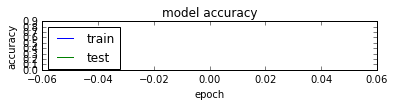

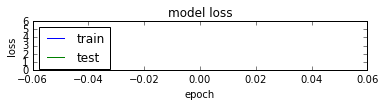

acc: 0.00%
Training and Testing on the OCT Volume no:  3
(3968, 224, 224, 3) (128, 224, 224, 3) (3968, 2) (128, 2)


Dir already existing
Dir already existing
Dir already existing
Train on 3968 samples, validate on 128 samples


Epoch 1/1


  16/3968 [..............................] - ETA: 52s - loss: 1.2878 - acc: 0.6250

  32/3968 [..............................] - ETA: 51s - loss: 1.0522 - acc: 0.7188

  48/3968 [..............................] - ETA: 50s - loss: 0.9170 - acc: 0.7708

  64/3968 [..............................] - ETA: 50s - loss: 0.8616 - acc: 0.7344

  80/3968 [..............................] - ETA: 50s - loss: 0.8078 - acc: 0.7625

  96/3968 [..............................] - ETA: 49s - loss: 0.7644 - acc: 0.7708

 112/3968 [..............................] - ETA: 49s - loss: 0.7142 - acc: 0.7946

 128/3968 [..............................] - ETA: 49s - loss: 0.7283 - acc: 0.7812

 144/3968 [>.............................] - ETA: 49s - loss: 0.7168 - acc: 0.7847

 160/3968 [>.............................] - ETA: 48s - loss: 0.6977 - acc: 0.7625

 176/3968 [>.............................] - ETA: 48s - loss: 0.6987 - acc: 0.7500

 192/3968 [>.............................] - ETA: 48s - loss: 0.6933 - acc: 0.7240

 208/3968 [>.............................] - ETA: 48s - loss: 0.6716 - acc: 0.7356

 224/3968 [>.............................] - ETA: 47s - loss: 0.6583 - acc: 0.7455

 240/3968 [>.............................] - ETA: 47s - loss: 0.6467 - acc: 0.7500

 256/3968 [>.............................] - ETA: 47s - loss: 0.6366 - acc: 0.7422

 272/3968 [=>............................] - ETA: 47s - loss: 0.6361 - acc: 0.7316

 288/3968 [=>............................] - ETA: 47s - loss: 0.6396 - acc: 0.7257

 304/3968 [=>............................] - ETA: 46s - loss: 0.6428 - acc: 0.7072

 320/3968 [=>............................] - ETA: 46s - loss: 0.6427 - acc: 0.7094

 336/3968 [=>............................] - ETA: 46s - loss: 0.6437 - acc: 0.7143

 352/3968 [=>............................] - ETA: 46s - loss: 0.6365 - acc: 0.7216

 368/3968 [=>............................] - ETA: 45s - loss: 0.6390 - acc: 0.7228

 384/3968 [=>............................] - ETA: 45s - loss: 0.6388 - acc: 0.7161

 400/3968 [==>...........................] - ETA: 45s - loss: 0.6354 - acc: 0.7275

 416/3968 [==>...........................] - ETA: 45s - loss: 0.6298 - acc: 0.7260

 432/3968 [==>...........................] - ETA: 45s - loss: 0.6253 - acc: 0.7269

 448/3968 [==>...........................] - ETA: 44s - loss: 0.6406 - acc: 0.7232

 464/3968 [==>...........................] - ETA: 44s - loss: 0.6465 - acc: 0.7220

 480/3968 [==>...........................] - ETA: 44s - loss: 0.6481 - acc: 0.7146

 496/3968 [==>...........................] - ETA: 44s - loss: 0.6486 - acc: 0.7198

 512/3968 [==>...........................] - ETA: 44s - loss: 0.6467 - acc: 0.7227

 528/3968 [==>...........................] - ETA: 43s - loss: 0.6421 - acc: 0.7292

 544/3968 [===>..........................] - ETA: 43s - loss: 0.6400 - acc: 0.7261



 560/3968 [===>..........................] - ETA: 43s - loss: 0.6370 - acc: 0.7286

 576/3968 [===>..........................] - ETA: 43s - loss: 0.6297 - acc: 0.7292

 592/3968 [===>..........................] - ETA: 43s - loss: 0.6250 - acc: 0.7314

 608/3968 [===>..........................] - ETA: 42s - loss: 0.6194 - acc: 0.7336

 624/3968 [===>..........................] - ETA: 42s - loss: 0.6162 - acc: 0.7356

 640/3968 [===>..........................] - ETA: 42s - loss: 0.6112 - acc: 0.7375



 656/3968 [===>..........................] - ETA: 42s - loss: 0.6092 - acc: 0.7409

 672/3968 [====>.........................] - ETA: 41s - loss: 0.6143 - acc: 0.7411

 688/3968 [====>.........................] - ETA: 41s - loss: 0.6121 - acc: 0.7398

 704/3968 [====>.........................] - ETA: 41s - loss: 0.6084 - acc: 0.7443

 720/3968 [====>.........................] - ETA: 41s - loss: 0.6059 - acc: 0.7444

 736/3968 [====>.........................] - ETA: 41s - loss: 0.6064 - acc: 0.7432

 752/3968 [====>.........................] - ETA: 40s - loss: 0.6065 - acc: 0.7460

 768/3968 [====>.........................] - ETA: 40s - loss: 0.6050 - acc: 0.7487

 784/3968 [====>.........................] - ETA: 40s - loss: 0.6019 - acc: 0.7500

 800/3968 [=====>........................] - ETA: 40s - loss: 0.5981 - acc: 0.7512

 816/3968 [=====>........................] - ETA: 40s - loss: 0.5936 - acc: 0.7500

 832/3968 [=====>........................] - ETA: 39s - loss: 0.5903 - acc: 0.7536

 848/3968 [=====>........................] - ETA: 39s - loss: 0.5883 - acc: 0.7559

 864/3968 [=====>........................] - ETA: 39s - loss: 0.5848 - acc: 0.7604

 880/3968 [=====>........................] - ETA: 39s - loss: 0.5873 - acc: 0.7614

 896/3968 [=====>........................] - ETA: 39s - loss: 0.5870 - acc: 0.7634

 912/3968 [=====>........................] - ETA: 38s - loss: 0.5846 - acc: 0.7664

 928/3968 [======>.......................] - ETA: 38s - loss: 0.5808 - acc: 0.7705

 944/3968 [======>.......................] - ETA: 38s - loss: 0.5770 - acc: 0.7733

 960/3968 [======>.......................] - ETA: 38s - loss: 0.5740 - acc: 0.7750

 976/3968 [======>.......................] - ETA: 38s - loss: 0.5894 - acc: 0.7756

 992/3968 [======>.......................] - ETA: 37s - loss: 0.5891 - acc: 0.7772

1008/3968 [======>.......................] - ETA: 37s - loss: 0.5886 - acc: 0.7778

1024/3968 [======>.......................] - ETA: 37s - loss: 0.5881 - acc: 0.7803

1040/3968 [======>.......................] - ETA: 37s - loss: 0.5859 - acc: 0.7837

1056/3968 [======>.......................] - ETA: 37s - loss: 0.5840 - acc: 0.7841

1072/3968 [=======>......................] - ETA: 36s - loss: 0.5822 - acc: 0.7854

1088/3968 [=======>......................] - ETA: 36s - loss: 0.5810 - acc: 0.7858

1104/3968 [=======>......................] - ETA: 36s - loss: 0.5776 - acc: 0.7889

1120/3968 [=======>......................] - ETA: 36s - loss: 0.5751 - acc: 0.7884

1136/3968 [=======>......................] - ETA: 36s - loss: 0.5729 - acc: 0.7905

1152/3968 [=======>......................] - ETA: 35s - loss: 0.5706 - acc: 0.7917

1168/3968 [=======>......................] - ETA: 35s - loss: 0.5686 - acc: 0.7937

1184/3968 [=======>......................] - ETA: 35s - loss: 0.5661 - acc: 0.7965

1200/3968 [========>.....................] - ETA: 35s - loss: 0.5638 - acc: 0.7975

1216/3968 [========>.....................] - ETA: 34s - loss: 0.5609 - acc: 0.8002

1232/3968 [========>.....................] - ETA: 34s - loss: 0.5582 - acc: 0.8019

1248/3968 [========>.....................] - ETA: 34s - loss: 0.5572 - acc: 0.8021

1264/3968 [========>.....................] - ETA: 34s - loss: 0.5656 - acc: 0.7998

1280/3968 [========>.....................] - ETA: 34s - loss: 0.5638 - acc: 0.8000

1296/3968 [========>.....................] - ETA: 33s - loss: 0.5613 - acc: 0.8017

1312/3968 [========>.....................] - ETA: 33s - loss: 0.5605 - acc: 0.8026

1328/3968 [=========>....................] - ETA: 33s - loss: 0.5585 - acc: 0.8042

1344/3968 [=========>....................] - ETA: 33s - loss: 0.5560 - acc: 0.8051

1360/3968 [=========>....................] - ETA: 33s - loss: 0.5543 - acc: 0.8044

1376/3968 [=========>....................] - ETA: 32s - loss: 0.5522 - acc: 0.8060

1392/3968 [=========>....................] - ETA: 32s - loss: 0.5501 - acc: 0.8082

1408/3968 [=========>....................] - ETA: 32s - loss: 0.5495 - acc: 0.8089

1424/3968 [=========>....................] - ETA: 32s - loss: 0.5481 - acc: 0.8111

1440/3968 [=========>....................] - ETA: 32s - loss: 0.5466 - acc: 0.8125

1456/3968 [==========>...................] - ETA: 31s - loss: 0.5503 - acc: 0.8118

1472/3968 [==========>...................] - ETA: 31s - loss: 0.5506 - acc: 0.8125

1488/3968 [==========>...................] - ETA: 31s - loss: 0.5483 - acc: 0.8145

1504/3968 [==========>...................] - ETA: 31s - loss: 0.5458 - acc: 0.8152

1520/3968 [==========>...................] - ETA: 31s - loss: 0.5442 - acc: 0.8164

1536/3968 [==========>...................] - ETA: 30s - loss: 0.5443 - acc: 0.8164

1552/3968 [==========>...................] - ETA: 30s - loss: 0.5425 - acc: 0.8183

1568/3968 [==========>...................] - ETA: 30s - loss: 0.5419 - acc: 0.8195

1584/3968 [==========>...................] - ETA: 30s - loss: 0.5403 - acc: 0.8207

1600/3968 [===========>..................] - ETA: 30s - loss: 0.5409 - acc: 0.8219

1616/3968 [===========>..................] - ETA: 29s - loss: 0.5394 - acc: 0.8224

1632/3968 [===========>..................] - ETA: 29s - loss: 0.5379 - acc: 0.8229

1648/3968 [===========>..................] - ETA: 29s - loss: 0.5380 - acc: 0.8228

1664/3968 [===========>..................] - ETA: 29s - loss: 0.5383 - acc: 0.8209

1680/3968 [===========>..................] - ETA: 29s - loss: 0.5379 - acc: 0.8214

1696/3968 [===========>..................] - ETA: 28s - loss: 0.5370 - acc: 0.8219

1712/3968 [===========>..................] - ETA: 28s - loss: 0.5361 - acc: 0.8224

1728/3968 [============>.................] - ETA: 28s - loss: 0.5359 - acc: 0.8229

1744/3968 [============>.................] - ETA: 28s - loss: 0.5371 - acc: 0.8234

1760/3968 [============>.................] - ETA: 28s - loss: 0.5362 - acc: 0.8244

1776/3968 [============>.................] - ETA: 27s - loss: 0.5361 - acc: 0.8249

1792/3968 [============>.................] - ETA: 27s - loss: 0.5350 - acc: 0.8259

1808/3968 [============>.................] - ETA: 27s - loss: 0.5343 - acc: 0.8263

1824/3968 [============>.................] - ETA: 27s - loss: 0.5328 - acc: 0.8262

1840/3968 [============>.................] - ETA: 27s - loss: 0.5313 - acc: 0.8272

1856/3968 [=============>................] - ETA: 26s - loss: 0.5307 - acc: 0.8276

1872/3968 [=============>................] - ETA: 26s - loss: 0.5296 - acc: 0.8280

1888/3968 [=============>................] - ETA: 26s - loss: 0.5283 - acc: 0.8289

1904/3968 [=============>................] - ETA: 26s - loss: 0.5279 - acc: 0.8298

1920/3968 [=============>................] - ETA: 26s - loss: 0.5260 - acc: 0.8302

1936/3968 [=============>................] - ETA: 25s - loss: 0.5243 - acc: 0.8306

1952/3968 [=============>................] - ETA: 25s - loss: 0.5230 - acc: 0.8309

1968/3968 [=============>................] - ETA: 25s - loss: 0.5226 - acc: 0.8308

1984/3968 [==============>...............] - ETA: 25s - loss: 0.5212 - acc: 0.8311

2000/3968 [==============>...............] - ETA: 25s - loss: 0.5216 - acc: 0.8305

2016/3968 [==============>...............] - ETA: 24s - loss: 0.5229 - acc: 0.8304

2032/3968 [==============>...............] - ETA: 24s - loss: 0.5242 - acc: 0.8307

2048/3968 [==============>...............] - ETA: 24s - loss: 0.5233 - acc: 0.8315

2064/3968 [==============>...............] - ETA: 24s - loss: 0.5228 - acc: 0.8309

2080/3968 [==============>...............] - ETA: 23s - loss: 0.5216 - acc: 0.8313

2096/3968 [==============>...............] - ETA: 23s - loss: 0.5205 - acc: 0.8325

2112/3968 [==============>...............] - ETA: 23s - loss: 0.5201 - acc: 0.8329

2128/3968 [===============>..............] - ETA: 23s - loss: 0.5192 - acc: 0.8332

2144/3968 [===============>..............] - ETA: 23s - loss: 0.5176 - acc: 0.8330

2160/3968 [===============>..............] - ETA: 22s - loss: 0.5167 - acc: 0.8343

2176/3968 [===============>..............] - ETA: 22s - loss: 0.5155 - acc: 0.8350

2192/3968 [===============>..............] - ETA: 22s - loss: 0.5146 - acc: 0.8358

2208/3968 [===============>..............] - ETA: 22s - loss: 0.5146 - acc: 0.8356

2224/3968 [===============>..............] - ETA: 22s - loss: 0.5134 - acc: 0.8363

2240/3968 [===============>..............] - ETA: 21s - loss: 0.5141 - acc: 0.8362

2256/3968 [================>.............] - ETA: 21s - loss: 0.5130 - acc: 0.8373

2272/3968 [================>.............] - ETA: 21s - loss: 0.5120 - acc: 0.8363

2288/3968 [================>.............] - ETA: 21s - loss: 0.5119 - acc: 0.8357

2304/3968 [================>.............] - ETA: 21s - loss: 0.5114 - acc: 0.8364

2320/3968 [================>.............] - ETA: 20s - loss: 0.5102 - acc: 0.8371

2336/3968 [================>.............] - ETA: 20s - loss: 0.5091 - acc: 0.8378

2352/3968 [================>.............] - ETA: 20s - loss: 0.5095 - acc: 0.8384

2368/3968 [================>.............] - ETA: 20s - loss: 0.5101 - acc: 0.8387

2384/3968 [=================>............] - ETA: 20s - loss: 0.5091 - acc: 0.8389

2400/3968 [=================>............] - ETA: 19s - loss: 0.5083 - acc: 0.8396

2416/3968 [=================>............] - ETA: 19s - loss: 0.5073 - acc: 0.8402

2432/3968 [=================>............] - ETA: 19s - loss: 0.5106 - acc: 0.8396

2448/3968 [=================>............] - ETA: 19s - loss: 0.5098 - acc: 0.8403

2464/3968 [=================>............] - ETA: 19s - loss: 0.5089 - acc: 0.8413

2480/3968 [=================>............] - ETA: 18s - loss: 0.5081 - acc: 0.8419

2496/3968 [=================>............] - ETA: 18s - loss: 0.5112 - acc: 0.8413

2512/3968 [=================>............] - ETA: 18s - loss: 0.5114 - acc: 0.8416

2528/3968 [==================>...........] - ETA: 18s - loss: 0.5109 - acc: 0.8422

2544/3968 [==================>...........] - ETA: 18s - loss: 0.5101 - acc: 0.8428

2560/3968 [==================>...........] - ETA: 17s - loss: 0.5094 - acc: 0.8438

2576/3968 [==================>...........] - ETA: 17s - loss: 0.5090 - acc: 0.8443

2592/3968 [==================>...........] - ETA: 17s - loss: 0.5085 - acc: 0.8441

2608/3968 [==================>...........] - ETA: 17s - loss: 0.5080 - acc: 0.8451

2624/3968 [==================>...........] - ETA: 17s - loss: 0.5072 - acc: 0.8460

2640/3968 [==================>...........] - ETA: 16s - loss: 0.5067 - acc: 0.8462

2656/3968 [===================>..........] - ETA: 16s - loss: 0.5061 - acc: 0.8464

2672/3968 [===================>..........] - ETA: 16s - loss: 0.5074 - acc: 0.8458

2688/3968 [===================>..........] - ETA: 16s - loss: 0.5067 - acc: 0.8460

2704/3968 [===================>..........] - ETA: 16s - loss: 0.5056 - acc: 0.8465

2720/3968 [===================>..........] - ETA: 15s - loss: 0.5047 - acc: 0.8474

2736/3968 [===================>..........] - ETA: 15s - loss: 0.5035 - acc: 0.8483

2752/3968 [===================>..........] - ETA: 15s - loss: 0.5046 - acc: 0.8477

2768/3968 [===================>..........] - ETA: 15s - loss: 0.5044 - acc: 0.8479

2784/3968 [====================>.........] - ETA: 15s - loss: 0.5037 - acc: 0.8484

2800/3968 [====================>.........] - ETA: 14s - loss: 0.5030 - acc: 0.8493

2816/3968 [====================>.........] - ETA: 14s - loss: 0.5044 - acc: 0.8498

2832/3968 [====================>.........] - ETA: 14s - loss: 0.5037 - acc: 0.8496

2848/3968 [====================>.........] - ETA: 14s - loss: 0.5026 - acc: 0.8504

2864/3968 [====================>.........] - ETA: 14s - loss: 0.5024 - acc: 0.8506

2880/3968 [====================>.........] - ETA: 13s - loss: 0.5018 - acc: 0.8507

2896/3968 [====================>.........] - ETA: 13s - loss: 0.5024 - acc: 0.8508

2912/3968 [=====================>........] - ETA: 13s - loss: 0.5031 - acc: 0.8510

2928/3968 [=====================>........] - ETA: 13s - loss: 0.5026 - acc: 0.8518

2944/3968 [=====================>........] - ETA: 13s - loss: 0.5027 - acc: 0.8522

2960/3968 [=====================>........] - ETA: 12s - loss: 0.5024 - acc: 0.8527

2976/3968 [=====================>........] - ETA: 12s - loss: 0.5020 - acc: 0.8522

2992/3968 [=====================>........] - ETA: 12s - loss: 0.5030 - acc: 0.8523

3008/3968 [=====================>........] - ETA: 12s - loss: 0.5023 - acc: 0.8527

3024/3968 [=====================>........] - ETA: 11s - loss: 0.5019 - acc: 0.8535

3040/3968 [=====================>........] - ETA: 11s - loss: 0.5024 - acc: 0.8536

3056/3968 [======================>.......] - ETA: 11s - loss: 0.5019 - acc: 0.8541

3072/3968 [======================>.......] - ETA: 11s - loss: 0.5016 - acc: 0.8542

3088/3968 [======================>.......] - ETA: 11s - loss: 0.5020 - acc: 0.8540

3104/3968 [======================>.......] - ETA: 10s - loss: 0.5015 - acc: 0.8544

3120/3968 [======================>.......] - ETA: 10s - loss: 0.5009 - acc: 0.8542

3136/3968 [======================>.......] - ETA: 10s - loss: 0.5006 - acc: 0.8543

3152/3968 [======================>.......] - ETA: 10s - loss: 0.4997 - acc: 0.8550

3168/3968 [======================>.......] - ETA: 10s - loss: 0.5017 - acc: 0.8545

3184/3968 [=======================>......] - ETA: 9s - loss: 0.5020 - acc: 0.8543 

3200/3968 [=======================>......] - ETA: 9s - loss: 0.5012 - acc: 0.8550

3216/3968 [=======================>......] - ETA: 9s - loss: 0.5024 - acc: 0.8548

3232/3968 [=======================>......] - ETA: 9s - loss: 0.5020 - acc: 0.8555

3248/3968 [=======================>......] - ETA: 9s - loss: 0.5016 - acc: 0.8562

3264/3968 [=======================>......] - ETA: 8s - loss: 0.5014 - acc: 0.8566

3280/3968 [=======================>......] - ETA: 8s - loss: 0.5006 - acc: 0.8573

3296/3968 [=======================>......] - ETA: 8s - loss: 0.4998 - acc: 0.8580

3312/3968 [========================>.....] - ETA: 8s - loss: 0.5005 - acc: 0.8581

3328/3968 [========================>.....] - ETA: 8s - loss: 0.5002 - acc: 0.8588

3344/3968 [========================>.....] - ETA: 7s - loss: 0.4996 - acc: 0.8594

3360/3968 [========================>.....] - ETA: 7s - loss: 0.4991 - acc: 0.8601

3376/3968 [========================>.....] - ETA: 7s - loss: 0.4983 - acc: 0.8605

3392/3968 [========================>.....] - ETA: 7s - loss: 0.4981 - acc: 0.8606

3408/3968 [========================>.....] - ETA: 7s - loss: 0.4999 - acc: 0.8600

3424/3968 [========================>.....] - ETA: 6s - loss: 0.4999 - acc: 0.8601

3440/3968 [=========================>....] - ETA: 6s - loss: 0.4997 - acc: 0.8602

3456/3968 [=========================>....] - ETA: 6s - loss: 0.5005 - acc: 0.8600

3472/3968 [=========================>....] - ETA: 6s - loss: 0.5001 - acc: 0.8603

3488/3968 [=========================>....] - ETA: 6s - loss: 0.4997 - acc: 0.8604

3504/3968 [=========================>....] - ETA: 5s - loss: 0.4990 - acc: 0.8607

3520/3968 [=========================>....] - ETA: 5s - loss: 0.4982 - acc: 0.8611

3536/3968 [=========================>....] - ETA: 5s - loss: 0.4983 - acc: 0.8611

3552/3968 [=========================>....] - ETA: 5s - loss: 0.4979 - acc: 0.8615

3568/3968 [=========================>....] - ETA: 5s - loss: 0.4973 - acc: 0.8621

3584/3968 [==========================>...] - ETA: 4s - loss: 0.4968 - acc: 0.8616

3600/3968 [==========================>...] - ETA: 4s - loss: 0.4966 - acc: 0.8617

3616/3968 [==========================>...] - ETA: 4s - loss: 0.4960 - acc: 0.8614

3632/3968 [==========================>...] - ETA: 4s - loss: 0.4952 - acc: 0.8621

3648/3968 [==========================>...] - ETA: 4s - loss: 0.4946 - acc: 0.8627

3664/3968 [==========================>...] - ETA: 3s - loss: 0.4973 - acc: 0.8622

3680/3968 [==========================>...] - ETA: 3s - loss: 0.4969 - acc: 0.8628

3696/3968 [==========================>...] - ETA: 3s - loss: 0.4972 - acc: 0.8623

3712/3968 [===========================>..] - ETA: 3s - loss: 0.4968 - acc: 0.8626

3728/3968 [===========================>..] - ETA: 3s - loss: 0.4964 - acc: 0.8632

3744/3968 [===========================>..] - ETA: 2s - loss: 0.4957 - acc: 0.8632

3760/3968 [===========================>..] - ETA: 2s - loss: 0.4954 - acc: 0.8636

3776/3968 [===========================>..] - ETA: 2s - loss: 0.4948 - acc: 0.8641

3792/3968 [===========================>..] - ETA: 2s - loss: 0.4953 - acc: 0.8642

3808/3968 [===========================>..] - ETA: 2s - loss: 0.4959 - acc: 0.8637

3824/3968 [===========================>..] - ETA: 1s - loss: 0.4957 - acc: 0.8643

3840/3968 [============================>.] - ETA: 1s - loss: 0.4953 - acc: 0.8643

3856/3968 [============================>.] - ETA: 1s - loss: 0.4950 - acc: 0.8646

3872/3968 [============================>.] - ETA: 1s - loss: 0.4952 - acc: 0.8649

3888/3968 [============================>.] - ETA: 1s - loss: 0.4947 - acc: 0.8650

3904/3968 [============================>.] - ETA: 0s - loss: 0.4940 - acc: 0.8655

3920/3968 [============================>.] - ETA: 0s - loss: 0.4935 - acc: 0.8656

3936/3968 [============================>.] - ETA: 0s - loss: 0.4935 - acc: 0.8659

3952/3968 [============================>.] - ETA: 0s - loss: 0.4930 - acc: 0.8664

Epoch 00000: val_acc improved from -inf to 0.00000, saving model to ./dataset/Cropped_BM3D/ExperimentResNet50/checkpoint/ResNet50_vol_3.hdf5


3968/3968 [==============================] - 51s - loss: 0.4923 - acc: 0.8669 - val_loss: 9.4739 - val_acc: 0.0000e+00

 32/128 [======>.......................] - ETA: 0s

 64/128 [==============>...............] - ETA: 0s

 96/128 [=====================>........] - ETA: 0s

128/128 [==============================] - 0s     


Test score: 9.47392487526
Test accuracy: 0.0
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


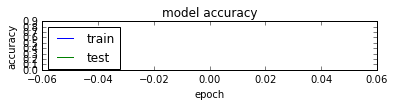

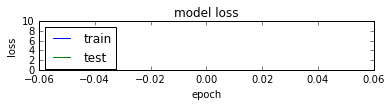

acc: 0.00%
Training and Testing on the OCT Volume no:  4
(3968, 224, 224, 3) (128, 224, 224, 3) (3968, 2) (128, 2)


Dir already existing
New Path created :  ./dataset/Cropped_BM3D/ExperimentResNet50/logs_tb/volume_4
Dir already existing
Train on 3968 samples, validate on 128 samples


Epoch 1/1


  16/3968 [..............................] - ETA: 53s - loss: 1.3060 - acc: 0.6250

  32/3968 [..............................] - ETA: 51s - loss: 1.5048 - acc: 0.5938

  48/3968 [..............................] - ETA: 50s - loss: 1.1985 - acc: 0.6667

  64/3968 [..............................] - ETA: 50s - loss: 1.0788 - acc: 0.6719

  80/3968 [..............................] - ETA: 49s - loss: 1.0040 - acc: 0.6500

  96/3968 [..............................] - ETA: 49s - loss: 0.9265 - acc: 0.6562



 112/3968 [..............................] - ETA: 49s - loss: 0.8753 - acc: 0.6786

 128/3968 [..............................] - ETA: 49s - loss: 0.8217 - acc: 0.7109

 144/3968 [>.............................] - ETA: 48s - loss: 0.7723 - acc: 0.7083

 160/3968 [>.............................] - ETA: 48s - loss: 0.7334 - acc: 0.7250

 176/3968 [>.............................] - ETA: 48s - loss: 0.7129 - acc: 0.7330

 192/3968 [>.............................] - ETA: 48s - loss: 0.6984 - acc: 0.7292

 208/3968 [>.............................] - ETA: 48s - loss: 0.6800 - acc: 0.7404

 224/3968 [>.............................] - ETA: 47s - loss: 0.6922 - acc: 0.7321

 240/3968 [>.............................] - ETA: 47s - loss: 0.6839 - acc: 0.7208

 256/3968 [>.............................] - ETA: 47s - loss: 0.6822 - acc: 0.7188

 272/3968 [=>............................] - ETA: 47s - loss: 0.6741 - acc: 0.7279

 288/3968 [=>............................] - ETA: 47s - loss: 0.6669 - acc: 0.7292

 304/3968 [=>............................] - ETA: 46s - loss: 0.6584 - acc: 0.7237

 320/3968 [=>............................] - ETA: 46s - loss: 0.6533 - acc: 0.7312

 336/3968 [=>............................] - ETA: 46s - loss: 0.6473 - acc: 0.7292

 352/3968 [=>............................] - ETA: 46s - loss: 0.6409 - acc: 0.7273

 368/3968 [=>............................] - ETA: 45s - loss: 0.6423 - acc: 0.7310

 384/3968 [=>............................] - ETA: 45s - loss: 0.6395 - acc: 0.7318

 400/3968 [==>...........................] - ETA: 45s - loss: 0.6343 - acc: 0.7375

 416/3968 [==>...........................] - ETA: 45s - loss: 0.6278 - acc: 0.7428

 432/3968 [==>...........................] - ETA: 45s - loss: 0.6234 - acc: 0.7407

 448/3968 [==>...........................] - ETA: 44s - loss: 0.6175 - acc: 0.7455

 464/3968 [==>...........................] - ETA: 44s - loss: 0.6165 - acc: 0.7457

 480/3968 [==>...........................] - ETA: 44s - loss: 0.6128 - acc: 0.7438

 496/3968 [==>...........................] - ETA: 44s - loss: 0.6088 - acc: 0.7440

 512/3968 [==>...........................] - ETA: 43s - loss: 0.6048 - acc: 0.7461

 528/3968 [==>...........................] - ETA: 43s - loss: 0.6017 - acc: 0.7462

 544/3968 [===>..........................] - ETA: 43s - loss: 0.5996 - acc: 0.7463

 560/3968 [===>..........................] - ETA: 43s - loss: 0.6038 - acc: 0.7464

 576/3968 [===>..........................] - ETA: 43s - loss: 0.5981 - acc: 0.7483

 592/3968 [===>..........................] - ETA: 42s - loss: 0.5973 - acc: 0.7483

 608/3968 [===>..........................] - ETA: 42s - loss: 0.5951 - acc: 0.7467

 624/3968 [===>..........................] - ETA: 42s - loss: 0.5913 - acc: 0.7468

 640/3968 [===>..........................] - ETA: 42s - loss: 0.5866 - acc: 0.7516

 656/3968 [===>..........................] - ETA: 42s - loss: 0.5905 - acc: 0.7500

 672/3968 [====>.........................] - ETA: 41s - loss: 0.5895 - acc: 0.7545

 688/3968 [====>.........................] - ETA: 41s - loss: 0.5939 - acc: 0.7515

 704/3968 [====>.........................] - ETA: 41s - loss: 0.5933 - acc: 0.7543

 720/3968 [====>.........................] - ETA: 41s - loss: 0.5903 - acc: 0.7542

 736/3968 [====>.........................] - ETA: 41s - loss: 0.5881 - acc: 0.7541

 752/3968 [====>.........................] - ETA: 40s - loss: 0.5849 - acc: 0.7553

 768/3968 [====>.........................] - ETA: 40s - loss: 0.5833 - acc: 0.7565

 784/3968 [====>.........................] - ETA: 40s - loss: 0.5803 - acc: 0.7577

 800/3968 [=====>........................] - ETA: 40s - loss: 0.5788 - acc: 0.7600

 816/3968 [=====>........................] - ETA: 40s - loss: 0.5775 - acc: 0.7586

 832/3968 [=====>........................] - ETA: 39s - loss: 0.5736 - acc: 0.7620

 848/3968 [=====>........................] - ETA: 39s - loss: 0.5713 - acc: 0.7642

 864/3968 [=====>........................] - ETA: 39s - loss: 0.5672 - acc: 0.7650

 880/3968 [=====>........................] - ETA: 39s - loss: 0.5645 - acc: 0.7659

 896/3968 [=====>........................] - ETA: 39s - loss: 0.5660 - acc: 0.7634

 912/3968 [=====>........................] - ETA: 38s - loss: 0.5631 - acc: 0.7654

 928/3968 [======>.......................] - ETA: 38s - loss: 0.5653 - acc: 0.7672

 944/3968 [======>.......................] - ETA: 38s - loss: 0.5649 - acc: 0.7691

 960/3968 [======>.......................] - ETA: 38s - loss: 0.5629 - acc: 0.7708

 976/3968 [======>.......................] - ETA: 38s - loss: 0.5624 - acc: 0.7715

 992/3968 [======>.......................] - ETA: 37s - loss: 0.5609 - acc: 0.7732

1008/3968 [======>.......................] - ETA: 37s - loss: 0.5571 - acc: 0.7748

1024/3968 [======>.......................] - ETA: 37s - loss: 0.5600 - acc: 0.7725

1040/3968 [======>.......................] - ETA: 37s - loss: 0.5625 - acc: 0.7702



1056/3968 [======>.......................] - ETA: 37s - loss: 0.5604 - acc: 0.7708

1072/3968 [=======>......................] - ETA: 36s - loss: 0.5581 - acc: 0.7715

1088/3968 [=======>......................] - ETA: 36s - loss: 0.5569 - acc: 0.7721

1104/3968 [=======>......................] - ETA: 36s - loss: 0.5557 - acc: 0.7717

1120/3968 [=======>......................] - ETA: 36s - loss: 0.5535 - acc: 0.7723

1136/3968 [=======>......................] - ETA: 36s - loss: 0.5524 - acc: 0.7738

1152/3968 [=======>......................] - ETA: 35s - loss: 0.5509 - acc: 0.7752

1168/3968 [=======>......................] - ETA: 35s - loss: 0.5487 - acc: 0.7757

1184/3968 [=======>......................] - ETA: 35s - loss: 0.5581 - acc: 0.7770

1200/3968 [========>.....................] - ETA: 35s - loss: 0.5568 - acc: 0.7792

1216/3968 [========>.....................] - ETA: 35s - loss: 0.5573 - acc: 0.7780

1232/3968 [========>.....................] - ETA: 34s - loss: 0.5554 - acc: 0.7800

1248/3968 [========>.....................] - ETA: 34s - loss: 0.5542 - acc: 0.7812

1264/3968 [========>.....................] - ETA: 34s - loss: 0.5538 - acc: 0.7824

1280/3968 [========>.....................] - ETA: 34s - loss: 0.5541 - acc: 0.7836

1296/3968 [========>.....................] - ETA: 34s - loss: 0.5547 - acc: 0.7816

1312/3968 [========>.....................] - ETA: 33s - loss: 0.5537 - acc: 0.7828

1328/3968 [=========>....................] - ETA: 33s - loss: 0.5545 - acc: 0.7839

1344/3968 [=========>....................] - ETA: 33s - loss: 0.5546 - acc: 0.7842

1360/3968 [=========>....................] - ETA: 33s - loss: 0.5540 - acc: 0.7853

1376/3968 [=========>....................] - ETA: 33s - loss: 0.5524 - acc: 0.7878

1392/3968 [=========>....................] - ETA: 32s - loss: 0.5520 - acc: 0.7888

1408/3968 [=========>....................] - ETA: 32s - loss: 0.5527 - acc: 0.7876

1424/3968 [=========>....................] - ETA: 32s - loss: 0.5517 - acc: 0.7886

1440/3968 [=========>....................] - ETA: 32s - loss: 0.5506 - acc: 0.7896

1456/3968 [==========>...................] - ETA: 31s - loss: 0.5501 - acc: 0.7905

1472/3968 [==========>...................] - ETA: 31s - loss: 0.5495 - acc: 0.7901

1488/3968 [==========>...................] - ETA: 31s - loss: 0.5489 - acc: 0.7917

1504/3968 [==========>...................] - ETA: 31s - loss: 0.5465 - acc: 0.7932

1520/3968 [==========>...................] - ETA: 31s - loss: 0.5437 - acc: 0.7947

1536/3968 [==========>...................]

 - ETA: 30s - loss: 0.5502 - acc: 0.7943

1552/3968 [==========>...................] - ETA: 30s - loss: 0.5505 - acc: 0.7919

1568/3968 [==========>...................] - ETA: 30s - loss: 0.5501 - acc: 0.7934



1584/3968 [==========>...................] - ETA: 30s - loss: 0.5487 - acc: 0.7948

1600/3968 [===========>..................] - ETA: 30s - loss: 0.5472 - acc: 0.7950

1616/3968 [===========>..................] - ETA: 29s - loss: 0.5506 - acc: 0.7958

1632/3968 [===========>..................] - ETA: 29s - loss: 0.5505 - acc: 0.7947

1648/3968 [===========>..................] - ETA: 29s - loss: 0.5498 - acc: 0.7943



1664/3968 [===========>..................] - ETA: 29s - loss: 0.5485 - acc: 0.7957

1680/3968 [===========>..................] - ETA: 29s - loss: 0.5482 - acc: 0.7964

1696/3968 [===========>..................] - ETA: 28s - loss: 0.5476 - acc: 0.7954

1712/3968 [===========>..................] - ETA: 28s - loss: 0.5470 - acc: 0.7938

1728/3968 [============>.................] - ETA: 28s - loss: 0.5466 - acc: 0.7934

1744/3968 [============>.................] - ETA: 28s - loss: 0.5454 - acc: 0.7947

1760/3968 [============>.................] - ETA: 28s - loss: 0.5439 - acc: 0.7943

1776/3968 [============>.................] - ETA: 27s - loss: 0.5423 - acc: 0.7950

1792/3968 [============>.................] - ETA: 27s - loss: 0.5432 - acc: 0.7952

1808/3968 [============>.................] - ETA: 27s - loss: 0.5423 - acc: 0.7954

1824/3968 [============>.................] - ETA: 27s - loss: 0.5422 - acc: 0.7966

1840/3968 [============>.................] - ETA: 27s - loss: 0.5427 - acc: 0.7962

1856/3968 [=============>................] - ETA: 26s - loss: 0.5422 - acc: 0.7963

1872/3968 [=============>................] - ETA: 26s - loss: 0.5415 - acc: 0.7954

1888/3968 [=============>................] - ETA: 26s - loss: 0.5423 - acc: 0.7966

1904/3968 [=============>................] - ETA: 26s - loss: 0.5414 - acc: 0.7978

1920/3968 [=============>................] - ETA: 26s - loss: 0.5405 - acc: 0.7979

1936/3968 [=============>................] - ETA: 25s - loss: 0.5400 - acc: 0.7991

1952/3968 [=============>................] - ETA: 25s - loss: 0.5417 - acc: 0.7992

1968/3968 [=============>................] - ETA: 25s - loss: 0.5413 - acc: 0.7998

1984/3968 [==============>...............] - ETA: 25s - loss: 0.5407 - acc: 0.7989

2000/3968 [==============>...............] - ETA: 25s - loss: 0.5392 - acc: 0.8000

2016/3968 [==============>...............] - ETA: 24s - loss: 0.5381 - acc: 0.8006

2032/3968 [==============>...............] - ETA: 24s - loss: 0.5379 - acc: 0.8007

2048/3968 [==============>...............] - ETA: 24s - loss: 0.5362 - acc: 0.8013

2064/3968 [==============>...............] - ETA: 24s - loss: 0.5366 - acc: 0.8018

2080/3968 [==============>...............] - ETA: 23s - loss: 0.5361 - acc: 0.8019

2096/3968 [==============>...............]

 - ETA: 23s - loss: 0.5347 - acc: 0.8030

2112/3968 [==============>...............] - ETA: 23s - loss: 0.5361 - acc: 0.8035

2128/3968 [===============>..............] - ETA: 23s - loss: 0.5367 - acc: 0.8040



2144/3968 [===============>..............] - ETA: 23s - loss: 0.5366 - acc: 0.8027

2160/3968 [===============>..............] - ETA: 22s - loss: 0.5363 - acc: 0.8023

2176/3968 [===============>..............] - ETA: 22s - loss: 0.5357 - acc: 0.8010

2192/3968 [===============>..............] - ETA: 22s - loss: 0.5361 - acc: 0.8016

2208/3968 [===============>..............] - ETA: 22s - loss: 0.5356 - acc: 0.8007

2224/3968 [===============>..............] - ETA: 22s - loss: 0.5346 - acc: 0.8022

2240/3968 [===============>..............] - ETA: 21s - loss: 0.5334 - acc: 0.8031

2256/3968 [================>.............] - ETA: 21s - loss: 0.5337 - acc: 0.8023

2272/3968 [================>.............] - ETA: 21s - loss: 0.5331 - acc: 0.8033

2288/3968 [================>.............] - ETA: 21s - loss: 0.5322 - acc: 0.8046

KeyboardInterrupt: 

In [17]:
# Train the model for each volume
path = root + '/weight/'
check_dir(path)
path = path + model_name + '_rndm_weight.h5'
# path = '/home/deeplearningutp/PycharmProjects/OCT_Project/dataset/Cropped_BM3D/tmp/weight/InceptionResNetV2_rndm_weight .h5'

cvscores = []
bb = []
k = 0
volume = 1
nohup = 1

no_patients = 32
no_data = 4096
no_train_data = no_data - (no_data / no_patients)
no_test_data = no_data - no_train_data

cv = cross_validation.KFold(no_data, n_folds=no_patients, shuffle=False, random_state=None)

for train_index, test_index in cv:  # remaining
       
    if test_index[0] == k and test_index[0] < k+int(no_test_data):  # take out
        
        print("Training and Testing on the OCT Volume no: ", volume)
        
        pru = []
        aba = []
        
        
        for i in range(0, int(no_train_data)):
            at = input_img[train_index[i]]
            pru.append(at)
        
        pru2 = []
        aba2 = []
        
        for j in range(0, int(no_test_data)):
            at2 = input_img[test_index[j]]
            pru2.append(at2)
        
        
        X_tr, X_tes = np.asarray(pru), np.asarray(pru2)
        y_tr, y_tes = input_labels[train_index[0:int(no_train_data)]], input_labels[test_index[0:int(no_test_data)]]
        print(X_tr.shape, X_tes.shape, y_tr.shape, y_tes.shape)
        
        
        # create model
        model.load_weights(path)
        
        
        # Setup checkpoint, log and run the experiment
        CHKPT_PTH = root + '/checkpoint/'
        check_dir(CHKPT_PTH)
        chkpt_pth = CHKPT_PTH + model_name + '_vol_' + str(volume) + '.hdf5'
        
        TB_LOG = root + '/logs_tb/volume_' + str(volume)
        check_dir(TB_LOG)
        
        CSVLOG_PTH = root + '/logs_csv/'
        check_dir(CSVLOG_PTH) 
        CSV_FILENAME = CSVLOG_PTH + 'csv_logger_' + str(volume)
       
        csvlogger = CSVLogger(CSV_FILENAME, 
                              separator=',', 
                              append=False)
        
        checkpointer = ModelCheckpoint(filepath=chkpt_pth,
                                   monitor='val_acc',
                                   verbose=1,
                                   save_best_only=True)
    
        tensorboard = TensorBoard(log_dir=TB_LOG,
                                  histogram_freq=0,
                                  batch_size=batch_size,
                                  write_graph=True,
                                  write_grads=False,
                                  write_images=False,
                                  embeddings_freq=0,
                                  embeddings_layer_names=None,
                                  embeddings_metadata=None)
    
        history = model.fit([X_tr], [y_tr],
                            batch_size=batch_size,
                            nb_epoch=nb_epochs,
                            verbose=1,
                            validation_data=(X_tes, y_tes),
                            callbacks=[checkpointer, tensorboard, csvlogger])
        # loss_history = history_callback.history["loss"]
        
        
        # evaluate the model
        bb1=model.predict([X_tes])
        scores = model.evaluate([X_tes], [y_tes], verbose=1)
        print('Test score:', scores[0])
        print('Test accuracy:', scores[1])
        print(history.history.keys())
        plt.figure()
        ax1 = plt.subplot2grid((4, 4), (0, 0), colspan=4)
        
        
        # summarize history for accuracy
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
        
        # summarize history for loss
        ax2 = plt.subplot2grid((4, 4), (1, 0), colspan=4)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        
        
        cvscores.append(scores[1] * 100)
        bb.append(bb1)
        
 
        # Next volume / patients
        volume += 1
        k += int(no_test_data)
        
    else:
        
        test_index[0]
        
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


In [ ]:
# Make prediction
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))
# print: [[u'n02504458', u'African_elephant']]
